<a href="https://colab.research.google.com/github/mizzony/ML-class/blob/main/portfolio2_(230147_sutinan)_UCI_credit_dataset_portfolio2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Buid model**


In [2]:
#loading UCI dataset from my github
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/mizzony/ML-class/refs/heads/main/UCI_Credit_Card.csv")

# First 5 rows
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [3]:
# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px  # For interactive plotting with Plotly

# explore data summary transpose the matrix so its easier to see
summary = df.describe().T
round(summary, 2)

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.50,8660.40,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.32,129747.66,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.60,0.49,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.85,0.79,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.55,0.52,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.49,9.22,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.02,1.12,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.13,1.20,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.17,1.20,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.22,1.17,-2.0,-1.00,0.0,0.00,8.0


According to dataset above. It show that PAY_0 - PAY_6 has already been converted to dummies variables. and the rest of the othetr features variables is numeric. As the requirements of scikit learn package. I need numeeric data and no missing values so I will check missing value next

In [5]:
#check missing values
print(df.isna().sum().sort_values(ascending=False))

ID                            0
BILL_AMT2                     0
PAY_AMT6                      0
PAY_AMT5                      0
PAY_AMT4                      0
PAY_AMT3                      0
PAY_AMT2                      0
PAY_AMT1                      0
BILL_AMT6                     0
BILL_AMT5                     0
BILL_AMT4                     0
BILL_AMT3                     0
BILL_AMT1                     0
LIMIT_BAL                     0
PAY_6                         0
PAY_5                         0
PAY_4                         0
PAY_3                         0
PAY_2                         0
PAY_0                         0
AGE                           0
MARRIAGE                      0
EDUCATION                     0
SEX                           0
default.payment.next.month    0
dtype: int64


no missing values in the present.
**Perform EDA on the dataset**

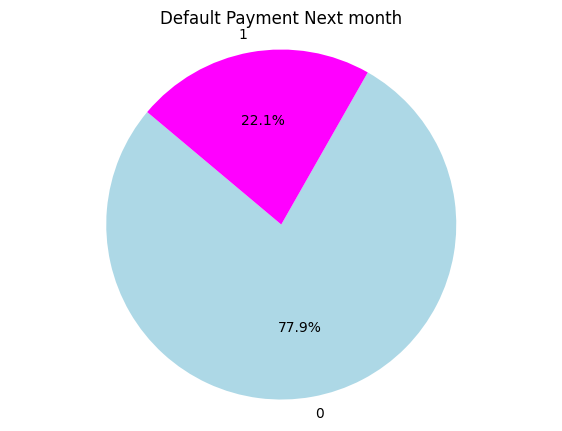

In [ ]:
#explore diabetes outcomes
Outcome_counts = df['default.payment.next.month'].value_counts()

plt.figure(figsize=(7, 5))
plt.pie(Outcome_counts, labels=Outcome_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'magenta'])
plt.title('Default Payment Next month') # 1= yes, 0=no
plt.axis('equal')
plt.show()

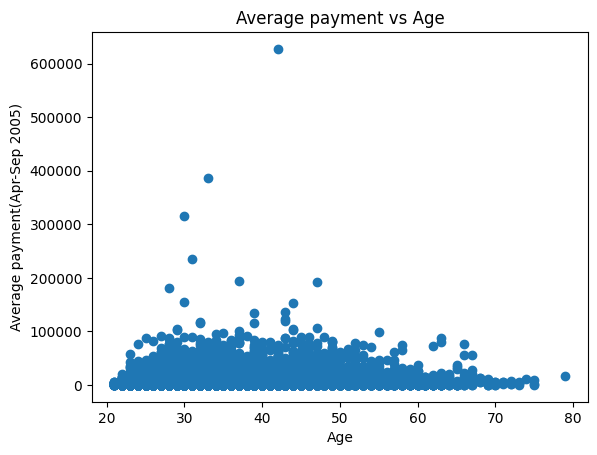

In [ ]:
#continuous variable factors
import matplotlib.pyplot as plt
import pandas as pd # Import pandas for DataFrame operations

#create new df to see to total amount of pay statement from april2005-sep2005
pay_state_avg6month = df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].mean(axis=1)


# Drawing the Scatter Plot
plt.scatter(df["AGE"], pay_state_avg6month) # Use bill_state_avg6month
plt.title('Average payment vs Age')
plt.xlabel('Age')
plt.ylabel('Average payment(Apr-Sep 2005)')
plt.show()

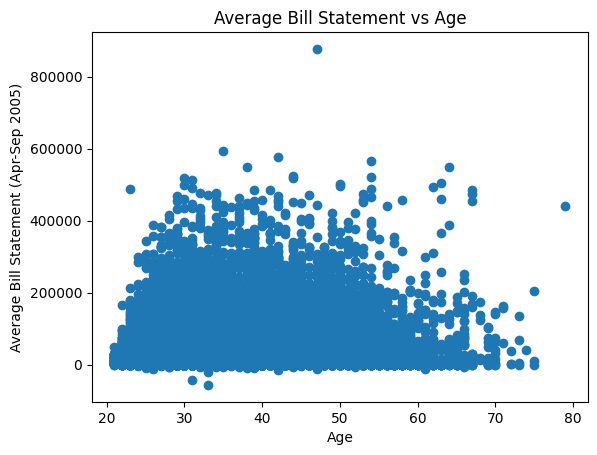

In [ ]:
#continuous variable factors
import matplotlib.pyplot as plt
import pandas as pd # Import pandas for DataFrame operations

#create new df to see to total amount of Bill statement from april2005-sep2005
bill_state_avg6month = df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].mean(axis=1)


# Drawing the Scatter Plot
plt.scatter(df["AGE"], bill_state_avg6month) # Use bill_state_avg6month
plt.title('Average Bill Statement vs Age')
plt.xlabel('Age')
plt.ylabel('Average Bill Statement (Apr-Sep 2005)')
plt.show()

EDA : Box plot and Histogram :  Univariate analysis , see dummy variable


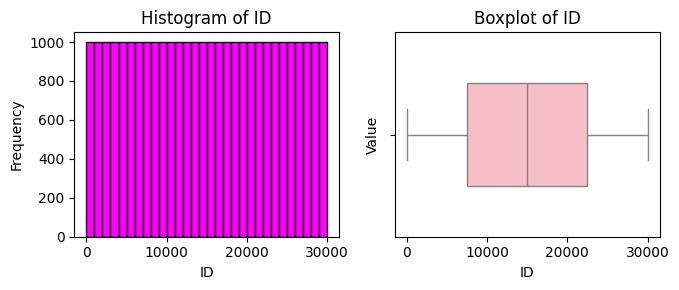

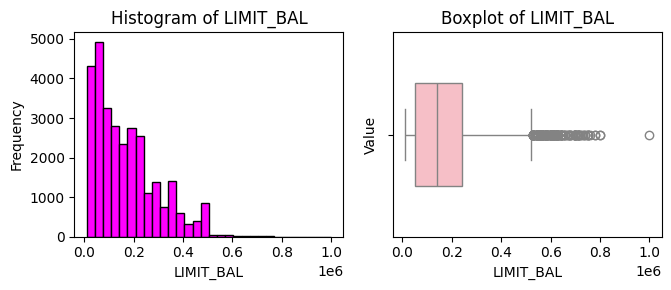

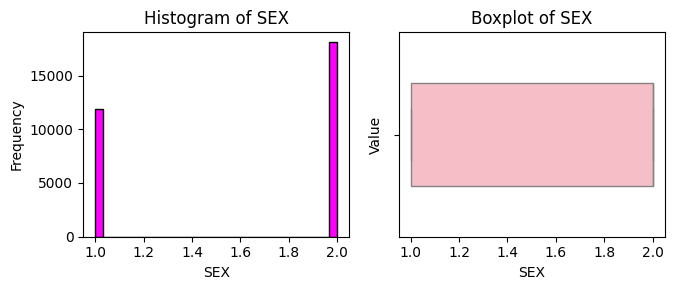

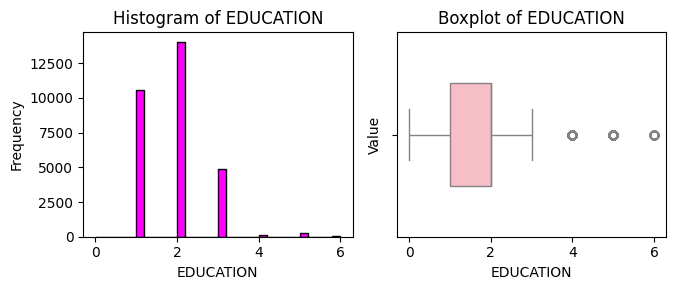

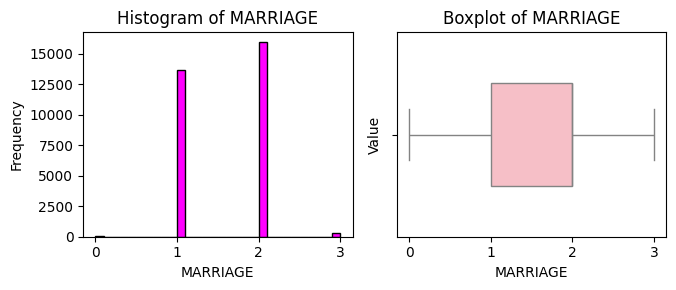

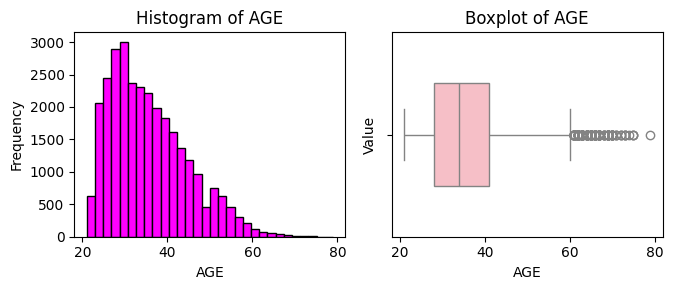

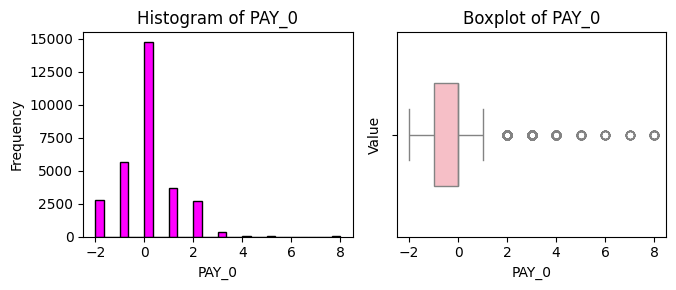

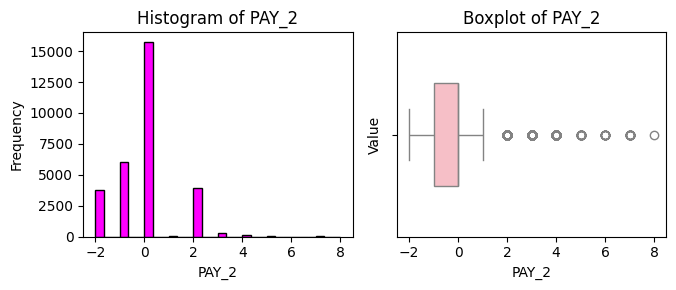

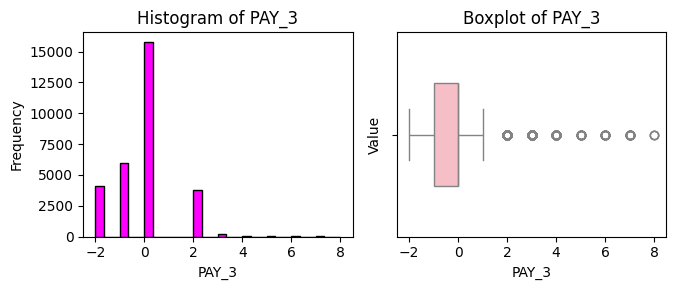

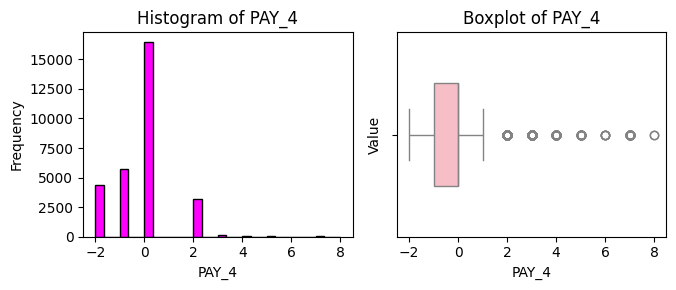

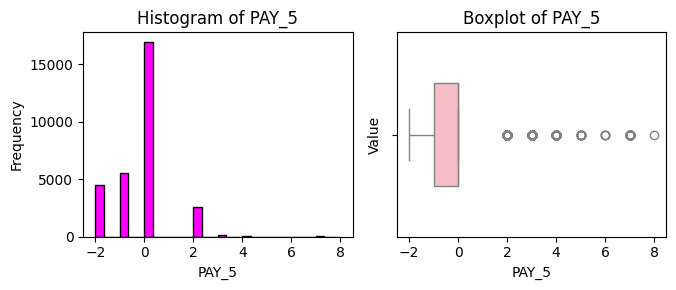

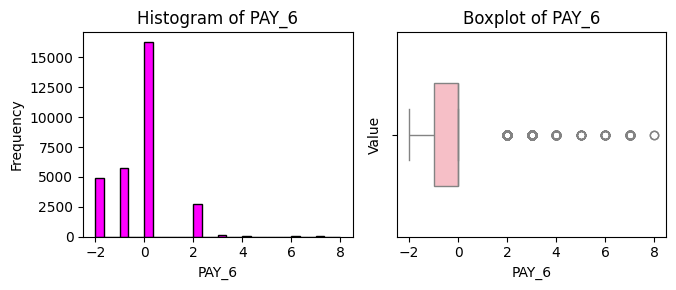

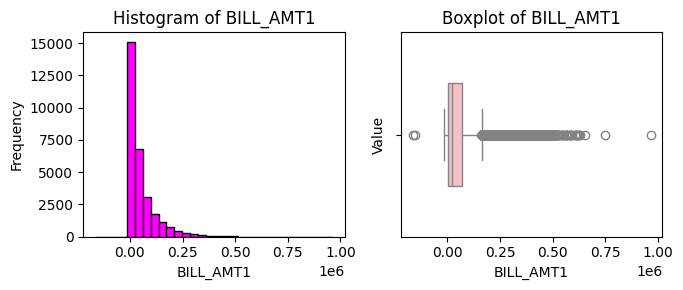

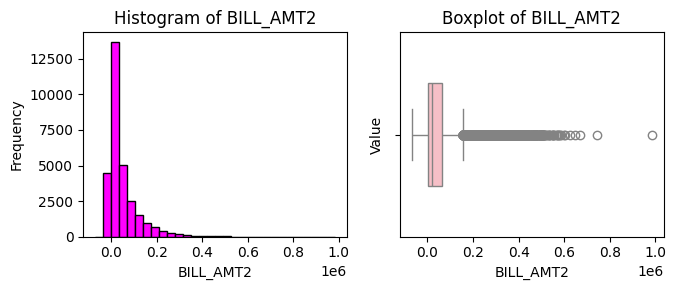

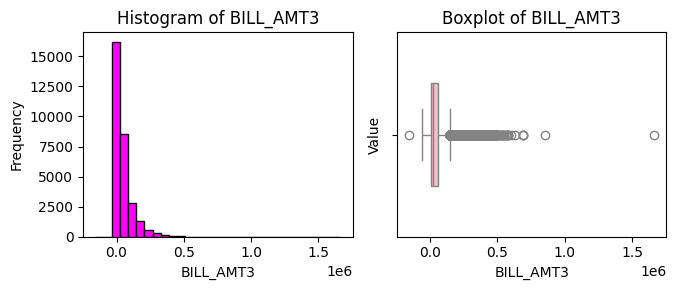

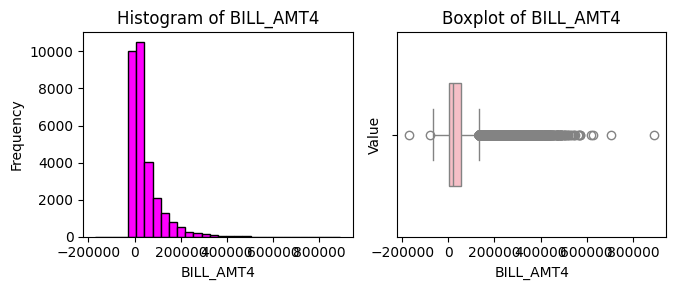

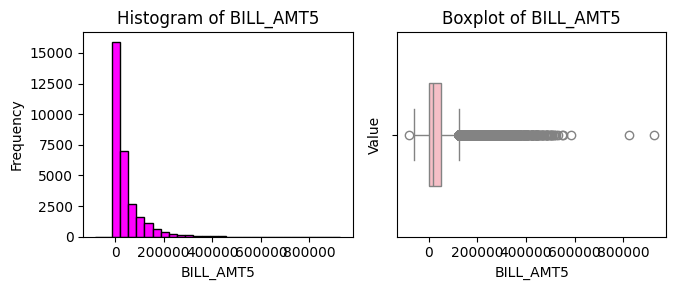

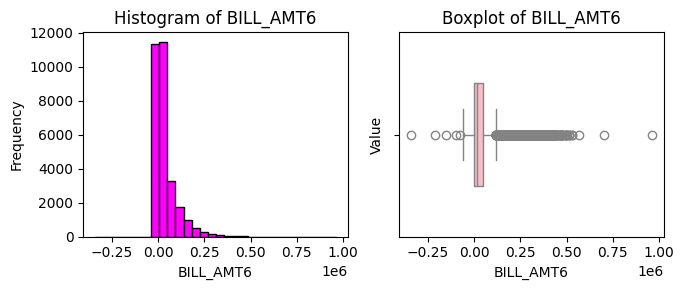

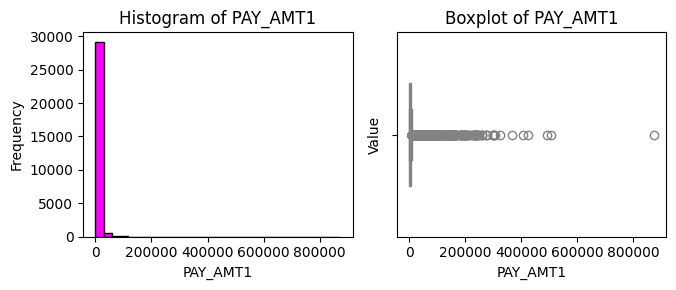

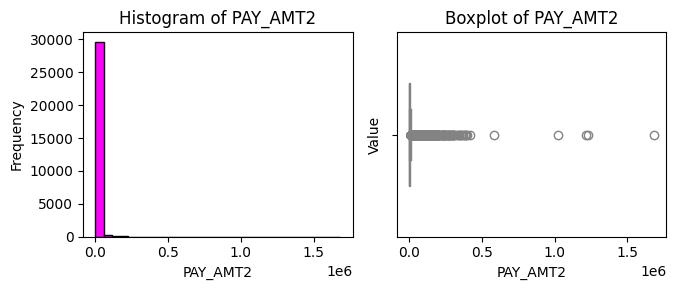

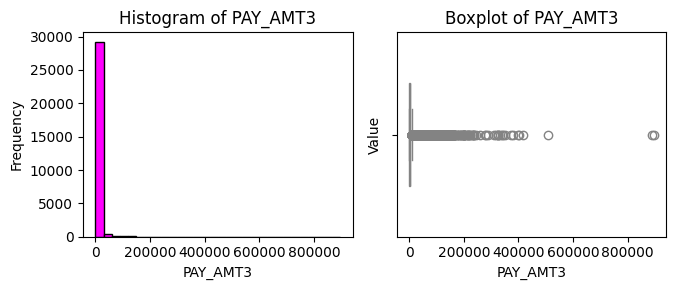

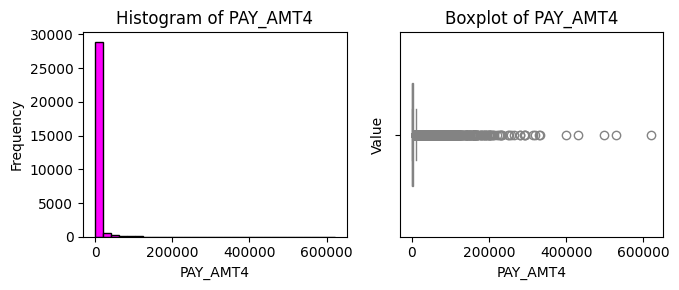

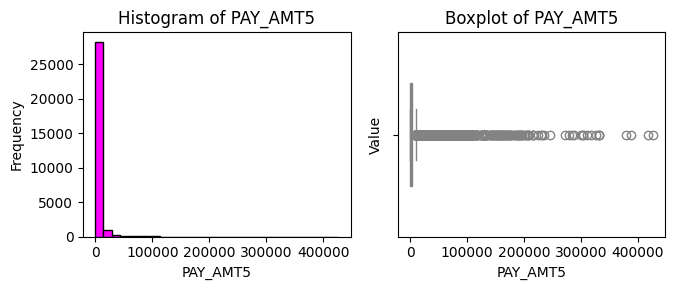

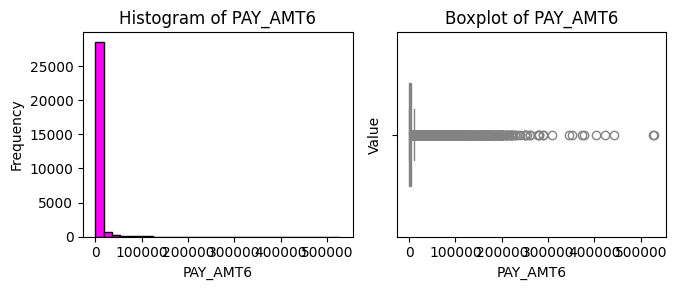

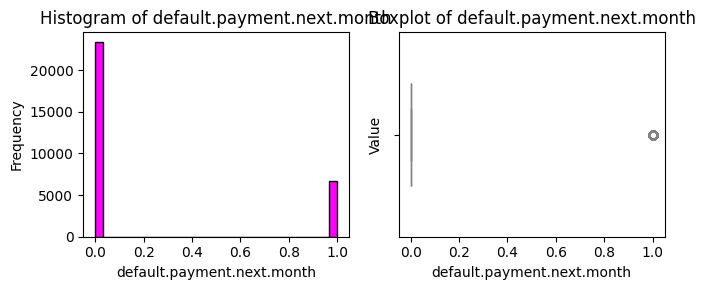

In [ ]:
import numpy as np

#Histogram for Visualize the distribution of column values, Boxplot for see percentiles and detect outliers
num_cols = df.select_dtypes(include=np.number).columns
numerical_data = df[num_cols]
for col in numerical_data[1:]:
    plt.figure(figsize=(10, 3))

    # Histogram
    plt.subplot(1, 3, 1)
    df[col].plot.hist(bins=30, color='magenta', edgecolor='black')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col}')

    # Boxplot
    plt.subplot(1, 3, 2)
    sns.boxplot(x=df[col],color='lightpink', width=0.5)
    plt.xlabel(col)
    plt.ylabel('Value')
    plt.title(f'Boxplot of {col}')


    plt.tight_layout()
    plt.show()


In [ ]:
#explore relationship of age distribution and predictor
fig = px.histogram(df, x='AGE', color='default.payment.next.month', barmode='group', nbins=20, title='Default payment by Age')
fig.update_layout(xaxis_title='Age', yaxis_title='Count')
fig.show()

As the histogram show, younger people tend to have Default payment next month compare to older people.

In [ ]:
#explore relationship of gender and predictor
fig = px.histogram(df, x='SEX', color='default.payment.next.month', barmode='group', nbins=2, title='Default payment by gender')
fig.update_layout(xaxis_title='gender', yaxis_title='Count')
fig.show() #sex 1= male, 2= female

In [ ]:
#explore relationship of Marital status and predictor
fig = px.histogram(df, x='EDUCATION', color='default.payment.next.month', barmode='group', nbins=10, title='Default payment by Education')
fig.update_layout(xaxis_title='Education', yaxis_title='Count')
fig.show() #1=graduate school , 2 uni, 3 high school

## Data Preprocessing
- Binary encoding
- one hot encoding

In [6]:
#binary encodning for SEX
#df = df['SEX']

# Binary encoding: convert 1 -> 0 and 2 -> 1
df['SEX'] = df['SEX'].map({1: 0, 2: 1})

# Display the DataFrame
print(df) #now sex is 0,1 male = 0

          ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1    20000.0    1          2         1   24      2      2     -1   
1          2   120000.0    1          2         2   26     -1      2      0   
2          3    90000.0    1          2         2   34      0      0      0   
3          4    50000.0    1          2         1   37      0      0      0   
4          5    50000.0    0          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996   220000.0    0          3         1   39      0      0      0   
29996  29997   150000.0    0          3         2   43     -1     -1     -1   
29997  29998    30000.0    0          2         2   37      4      3      2   
29998  29999    80000.0    0          3         1   41      1     -1      0   
29999  30000    50000.0    0          2         1   46      0      0      0   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6 

In [7]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Initialize the OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Apply one-hot encoding to the 'Education' and 'Marriage' columns
encoded_columns = encoder.fit_transform(df[['EDUCATION', 'MARRIAGE']])

# Get feature names for the one-hot encoded columns
encoded_feature_names = encoder.get_feature_names_out(['EDUCATION', 'MARRIAGE'])

# Convert encoded columns to a DataFrame
encoded_df = pd.DataFrame(encoded_columns, columns=encoded_feature_names)

# Concatenate the one-hot encoded columns back to the original DataFrame
df = pd.concat([df.drop(['EDUCATION', 'MARRIAGE'], axis=1), encoded_df], axis=1)

# Display the updated DataFrame
print(df)

          ID  LIMIT_BAL  SEX  AGE  PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  \
0          1    20000.0    1   24      2      2     -1     -1     -2     -2   
1          2   120000.0    1   26     -1      2      0      0      0      2   
2          3    90000.0    1   34      0      0      0      0      0      0   
3          4    50000.0    1   37      0      0      0      0      0      0   
4          5    50000.0    0   57     -1      0     -1      0      0      0   
...      ...        ...  ...  ...    ...    ...    ...    ...    ...    ...   
29995  29996   220000.0    0   39      0      0      0      0      0      0   
29996  29997   150000.0    0   43     -1     -1     -1     -1      0      0   
29997  29998    30000.0    0   37      4      3      2     -1      0      0   
29998  29999    80000.0    0   41      1     -1      0      0      0     -1   
29999  30000    50000.0    0   46      0      0      0      0      0      0   

       ...  default.payment.next.month  EDUCATION_1

In [8]:
df = df.astype(int)
df.head()

,ID,LIMIT_BAL,SEX,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,default.payment.next.month,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,1,20000,1,24,2,2,-1,-1,-2,-2,...,1,0,1,0,0,0,0,1,0,0
1,2,120000,1,26,-1,2,0,0,0,2,...,1,0,1,0,0,0,0,0,1,0
2,3,90000,1,34,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,4,50000,1,37,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,5,50000,0,57,-1,0,-1,0,0,0,...,0,0,1,0,0,0,0,1,0,0


MAP the late payment of Pay0-Pay6 into 1 because its mean pay early or pay on the due date

In [9]:
# Define mapping for 'pay duly' statuses
pay_mapping = {-2: 0, -1: 0}  # Map both -2 (advance) and -1 (on-time) to 0 (no delay)

# List of payment columns to transform
pay_columns = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

# Apply the mapping to each PAY column
for col in pay_columns:
    df[col] = df[col].replace(pay_mapping)

# Verify the transformation
print(df[pay_columns].head())


   PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6
0      2      2      0      0      0      0
1      0      2      0      0      0      2
2      0      0      0      0      0      0
3      0      0      0      0      0      0
4      0      0      0      0      0      0


In [10]:
#review our updated dataframe (after map early payment)
df.head()

,ID,LIMIT_BAL,SEX,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,default.payment.next.month,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,1,20000,1,24,2,2,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0
1,2,120000,1,26,0,2,0,0,0,2,...,1,0,1,0,0,0,0,0,1,0
2,3,90000,1,34,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,4,50000,1,37,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,5,50000,0,57,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [ ]:
df1= df #back up data

In [ ]:
#check multicorlinearlity before fitting model
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select features only for VIF calculation
X_vif = df.drop(columns=['default.payment.next.month'])  # Exclude the target variable if it's in df2

# Add constant for VIF calculation
X_vif = sm.add_constant(X_vif)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X_vif.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print(vif_data)

        Feature          VIF
0         const  2737.766986
1            ID     1.016865
2     LIMIT_BAL     1.423519
3           SEX     1.023331
4           AGE     1.387828
5         PAY_0     2.026386
6         PAY_2     2.622814
7         PAY_3     2.519797
8         PAY_4     2.979290
9         PAY_5     3.253079
10        PAY_6     2.294908
11    BILL_AMT1    13.985007
12    BILL_AMT2    25.803053
13    BILL_AMT3    21.750645
14    BILL_AMT4    20.364618
15    BILL_AMT5    24.999205
16    BILL_AMT6    15.006422
17     PAY_AMT1     1.703029
18     PAY_AMT2     2.231895
19     PAY_AMT3     1.743561
20     PAY_AMT4     1.638748
21     PAY_AMT5     1.685336
22     PAY_AMT6     1.170074
23  EDUCATION_1   490.272128
24  EDUCATION_2   534.599105
25  EDUCATION_3   294.817516
26  EDUCATION_4     9.752400
27  EDUCATION_5    20.829321
28  EDUCATION_6     4.641551
29   MARRIAGE_1   139.172869
30   MARRIAGE_2   139.845825
31   MARRIAGE_3     6.944000


In [ ]:
#check multicorlinearlity before fitting model one more time
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select features only for VIF calculation
X_vif = df.drop(columns=['ID','EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_5', 'MARRIAGE_1', 'MARRIAGE_2','EDUCATION_6','MARRIAGE_3']) #'BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6'])
  # Exclude the target variable if it's in df2

# Add constant for VIF calculation
X_vif = sm.add_constant(X_vif)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X_vif.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print(vif_data)

                       Feature        VIF
0                        const  19.731764
1                    LIMIT_BAL   1.299870
2                          SEX   1.014641
3                          AGE   1.033113
4                        PAY_0   2.132798
5                        PAY_2   2.621517
6                        PAY_3   2.519396
7                        PAY_4   2.969027
8                        PAY_5   3.252015
9                        PAY_6   2.296089
10                   BILL_AMT1  13.968784
11                   BILL_AMT2  25.791331
12                   BILL_AMT3  21.742242
13                   BILL_AMT4  20.256974
14                   BILL_AMT5  24.916015
15                   BILL_AMT6  14.982098
16                    PAY_AMT1   1.703246
17                    PAY_AMT2   2.230871
18                    PAY_AMT3   1.742421
19                    PAY_AMT4   1.636167
20                    PAY_AMT5   1.683788
21                    PAY_AMT6   1.169642
22  default.payment.next.month   1

Perform Logistic model: Using Logit from statsmodels.formula.api instead of OLS because of the outcome is binary classification and as you can see above the linear regression trend line doesnt really fit the value perfectly compare to logistic regression trend line

In [ ]:
#Reduce multicolinearlity and fix imbalanced dataset
import statsmodels.api as sm
# Define the independent variables (X) and the dependent variable (y)
X = df.drop(columns=['default.payment.next.month','BILL_AMT3','BILL_AMT5','BILL_AMT4','BILL_AMT6','EDUCATION_1','EDUCATION_2','EDUCATION_3','EDUCATION_4','EDUCATION_5','EDUCATION_6'])
y = df['default.payment.next.month']

# Add a constant (intercept term) to the model
X = sm.add_constant(X)

# Fit the logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Print the summary of the model
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.445096
         Iterations 7
                               Logit Regression Results                               
Dep. Variable:     default.payment.next.month   No. Observations:                30000
Model:                                  Logit   Df Residuals:                    29978
Method:                                   MLE   Df Model:                           21
Date:                        Sat, 26 Oct 2024   Pseudo R-squ.:                  0.1577
Time:                                12:35:56   Log-Likelihood:                -13353.
converged:                               True   LL-Null:                       -15853.
Covariance Type:                    nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.9785      0.554     -5.377 

In [ ]:
#Evaluating Performance
import statsmodels.api as sm
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

# Define the independent variables (X) and the dependent variable (y)
X = df.drop(columns=['default.payment.next.month','BILL_AMT3','BILL_AMT5','BILL_AMT4','BILL_AMT6','EDUCATION_1','EDUCATION_2','EDUCATION_3','EDUCATION_4','EDUCATION_5','EDUCATION_6'])
y = df['default.payment.next.month']

# Add a constant (intercept term) to the model
X = sm.add_constant(X)

# Initialize KFold for cross-validation
kf = KFold(n_splits=5)  # 5 folds

# Store accuracy scores for each fold
accuracy_scores = []

# Perform cross-validation to help performs consistently on new,
#unseen data, which is the ultimate goal in machine learning and predictive modeling.
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the logistic regression model on the training data
    logit_model = sm.Logit(y_train, X_train)
    result = logit_model.fit()

    # Predict on the test data
    y_pred = result.predict(X_test)
    y_pred_class = (y_pred > 0.5).astype(int) # Convert probabilities to class labels

    # Calculate accuracy and append to the list
    accuracy_scores.append(accuracy_score(y_test, y_pred_class))

# Calculate and print the mean accuracy
print(f"Cross-validated accuracy: {np.mean(accuracy_scores)}")

Optimization terminated successfully.
         Current function value: 0.440666
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.439050
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.442804
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.452024
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.450063
         Iterations 7
Cross-validated accuracy: 0.8173333333333334


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Convert to DataFrame
df1 = pd.DataFrame(df)

# Define the independent variables (X) and the dependent variable (y)
X = df.drop(columns=['default.payment.next.month','BILL_AMT3','BILL_AMT5','BILL_AMT4','BILL_AMT6','EDUCATION_1','EDUCATION_2','EDUCATION_3','EDUCATION_4','EDUCATION_5','EDUCATION_6'])
y = df['default.payment.next.month']


# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
log_reg_model = LogisticRegression()

# Fit the model
log_reg_model.fit(X_train, y_train)

# Predict the test data
y_pred = log_reg_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print results 0 = no diabetes, 1 = diabetes).
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.7811666666666667
Confusion Matrix:
 [[4687    0]
 [1313    0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      1.00      0.88      4687
           1       0.00      0.00      0.00      1313

    accuracy                           0.78      6000
   macro avg       0.39      0.50      0.44      6000
weighted avg       0.61      0.78      0.69      6000



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

In [ ]:
#improve the model performance by  class_weight set to 'balanced'
 #(Handle class imbalance by using class_weight='balanced'.)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize logistic regression with class_weight set to 'balanced'
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)

y_prob = model.predict_proba(X_test)[:, 1]  # Get the probability of the positive class
y_pred = (y_prob > 0.5).astype(int)

# Evaluate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", class_report)

Confusion Matrix:
[[3930  757]
 [ 574  739]]
Accuracy: 0.7781666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.84      0.86      4687
           1       0.49      0.56      0.53      1313

    accuracy                           0.78      6000
   macro avg       0.68      0.70      0.69      6000
weighted avg       0.79      0.78      0.78      6000



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


after improving the model by eliminate multicolinearity and fix imbalanced dataset('class_weight = balanced') Now we receive Accuracy 77.81% , tredhold 0.5,

In [11]:
#try with different algorithom like XGboost and Decision Tree

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Convert to DataFrame
df1 = pd.DataFrame(df)

# Define the independent variables (X) and the dependent variable (y)
X = df.drop(columns=['default.payment.next.month','BILL_AMT3','BILL_AMT5','BILL_AMT4','BILL_AMT6','EDUCATION_1','EDUCATION_2','EDUCATION_3','EDUCATION_4','EDUCATION_5','EDUCATION_6'])
y = df['default.payment.next.month']

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Evaluate Decision Tree model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
class_report_dt = classification_report(y_test, y_pred_dt)

print("Decision Tree Results")
print(f"Accuracy: {accuracy_dt}")
print("Confusion Matrix:\n", conf_matrix_dt)
print("Classification Report:\n", class_report_dt)

# XGBoost Model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate XGBoost model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
class_report_xgb = classification_report(y_test, y_pred_xgb)

print("\nXGBoost Results")
print(f"Accuracy: {accuracy_xgb}")
print("Confusion Matrix:\n", conf_matrix_xgb)
print("Classification Report:\n", class_report_xgb)


Decision Tree Results
Accuracy: 0.7296666666666667
Confusion Matrix:
 [[3832  855]
 [ 767  546]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.82      0.83      4687
           1       0.39      0.42      0.40      1313

    accuracy                           0.73      6000
   macro avg       0.61      0.62      0.61      6000
weighted avg       0.74      0.73      0.73      6000



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:27:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Results
Accuracy: 0.8151666666666667
Confusion Matrix:
 [[4423  264]
 [ 845  468]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.94      0.89      4687
           1       0.64      0.36      0.46      1313

    accuracy                           0.82      6000
   macro avg       0.74      0.65      0.67      6000
weighted avg       0.80      0.82      0.79      6000



After try different algorithm. XGboost gives the highest accuracy at 81.51% then Logistic regression 77.81% and followed by Decision tree at 72.96%.

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd

# Convert to DataFrame
df1 = pd.DataFrame(df)

# Define the independent variables (X) and the dependent variable (y)
X = df.drop(columns=['default.payment.next.month','BILL_AMT3','BILL_AMT5','BILL_AMT4','BILL_AMT6','EDUCATION_1','EDUCATION_2','EDUCATION_3','EDUCATION_4','EDUCATION_5','EDUCATION_6'])
y = df['default.payment.next.month']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set up pipelines
# Decision Tree pipeline
dt_pipeline = Pipeline([
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# XGBoost pipeline
xgb_pipeline = Pipeline([
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

# Parameter grids for GridSearchCV
param_grid_dt = {
    'classifier__max_depth': [3, 5, 10, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

param_grid_xgb = {
    'classifier__max_depth': [3, 5, 7],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__n_estimators': [50, 100, 200]
}

# Perform GridSearchCV for Decision Tree
grid_search_dt = GridSearchCV(dt_pipeline, param_grid_dt, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train, y_train)

# Best Decision Tree model
best_dt_model = grid_search_dt.best_estimator_
y_pred_dt = best_dt_model.predict(X_test)

# Evaluate Decision Tree model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
class_report_dt = classification_report(y_test, y_pred_dt)

print("Best Decision Tree Model")
print("Best Parameters:", grid_search_dt.best_params_)
print(f"Accuracy: {accuracy_dt}")
print("Confusion Matrix:\n", conf_matrix_dt)
print("Classification Report:\n", class_report_dt)

# Perform GridSearchCV for XGBoost
grid_search_xgb = GridSearchCV(xgb_pipeline, param_grid_xgb, cv=5, scoring='accuracy')
grid_search_xgb.fit(X_train, y_train)

# Best XGBoost model
best_xgb_model = grid_search_xgb.best_estimator_
y_pred_xgb = best_xgb_model.predict(X_test)

# Evaluate XGBoost model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
class_report_xgb = classification_report(y_test, y_pred_xgb)

print("\nBest XGBoost Model")
print("Best Parameters:", grid_search_xgb.best_params_)
print(f"Accuracy: {accuracy_xgb}")
print("Confusion Matrix:\n", conf_matrix_xgb)
print("Classification Report:\n", class_report_xgb)


Best Decision Tree Model
Best Parameters: {'classifier__max_depth': 3, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}
Accuracy: 0.8213333333333334
Confusion Matrix:
 [[4447  240]
 [ 832  481]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      4687
           1       0.67      0.37      0.47      1313

    accuracy                           0.82      6000
   macro avg       0.75      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:32:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:32:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:32:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:32:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:32:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e


Best XGBoost Model
Best Parameters: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 50}
Accuracy: 0.8206666666666667
Confusion Matrix:
 [[4464  223]
 [ 853  460]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      4687
           1       0.67      0.35      0.46      1313

    accuracy                           0.82      6000
   macro avg       0.76      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000



After applying gridsearch Cross validation (CV).Best XGBoost Model
Best Parameters: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 50}
Accuracy: 0.8206666666666667 with F1 [0] score = 0.84

Best Decision Tree Model
Best Parameters: {'classifier__max_depth': 3, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}
Accuracy: 0.8213333333333334 F1=0.89

In summary, The model that can describe the UCI credit score after apply Gridsearch CV is Decesion tree with these Metrics performace:

Accuracy: 0.8213 (82.13%), indicating that the model correctly classifies about 82% of the test samples.
F1 Score: 0.89, showing a strong balance between precision and recall, which is particularly beneficial if the dataset is imbalanced.